In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pd.set_option("display.max_columns", None)

In [2]:
fire_robust = pd.read_csv('./fire_robust.csv', encoding = 'cp949').drop('Unnamed: 0', axis  = 1)
fire_minmax = pd.read_csv('./fire_minmax.csv', encoding = 'cp949').drop('Unnamed: 0', axis  = 1)
fire_standard = pd.read_csv('./fire_standard.csv', encoding = 'cp949').drop('Unnamed: 0', axis  = 1)

In [3]:
fire_robust

,fr_yn,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,ttl_grnd_flr,ttl_dwn_flr,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,cctv_dstnc,fr_wthr_fclt_in_100m,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m
0,1,-0.5,7.118391,15.414625,3.453766,4.0,0.0,0.623981,-0.015854,-0.060996,-0.103049,-0.486842,-0.040897,0.0,0.0,-0.305763,0.308978,0.307325,-0.212909,3.50
1,1,-0.5,-0.045959,0.207200,0.514391,1.0,0.0,0.623545,0.129940,0.417868,-0.027878,-0.486842,0.029886,0.0,0.0,-0.014946,0.271485,0.264087,-0.083815,0.00
2,1,0.0,-0.012133,-0.114455,-0.024495,0.0,0.0,0.618619,-0.133515,-0.665985,-0.141381,-0.486842,-0.228077,1.0,2.0,-0.341735,0.318755,0.287439,-0.264933,1.75
3,0,-0.5,-0.817192,0.082019,-0.722596,2.0,0.0,0.623794,-0.190713,-0.001988,-0.134910,-0.486842,-0.122690,1.0,0.0,-0.255858,0.315126,0.253576,-0.232177,3.00
4,1,1.0,-0.270976,-0.227496,0.985915,0.0,0.0,0.616811,0.014610,0.810972,-0.120971,-0.486842,-0.151003,0.0,0.0,-0.188727,0.288896,0.264314,-0.226397,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22317,0,-0.5,-0.048607,-0.130383,-0.024495,0.0,0.0,0.068486,-0.479192,-0.066910,-0.099067,0.052632,-0.138419,0.0,0.0,0.426852,-0.336367,0.170907,-0.139692,4.75
22318,0,-0.5,0.263769,1.434985,-0.368034,2.0,0.0,0.080394,-0.336351,0.205114,-0.130927,0.355263,-0.243807,0.0,1.0,-0.251552,-0.464998,0.603287,0.123314,4.25
22319,0,-0.5,1.267961,1.438453,1.919780,1.0,0.0,2.180863,-0.075228,2.663277,-0.089608,0.355263,0.476602,0.0,0.0,-0.135782,-0.447360,0.819136,0.531792,0.00
22320,0,-0.5,0.577469,1.683163,-0.256889,2.0,0.0,4.424975,-0.379405,0.410562,-0.116988,0.355263,-0.190326,0.0,1.0,-0.346802,-0.471827,0.544197,-0.135838,0.25


## 1. Logistic regression

### 1-1. Robust

In [9]:
res = smf.ols(formula = 'fr_yn ~ bldng_cnt + ttl_ar + ttl_grnd_flr + ttl_dwn_flr + hm_cnt + fr_sttn_dstnc + bldng_ar_prc + fr_wthr_fclt_dstnc + fr_mn_cnt + cctv_dstnc + fr_wthr_fclt_in_100m + cctv_in_100m + sft_emrgnc_bll_dstnc + ahsm_dstnc', data = fire_robust).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  fr_yn   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     93.66
Date:                Wed, 30 Jun 2021   Prob (F-statistic):          1.63e-263
Time:                        12:51:30   Log-Likelihood:                -7069.4
No. Observations:               22322   AIC:                         1.417e+04
Df Residuals:                   22307   BIC:                         1.429e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1329 

In [11]:
fire_robust_selected = fire_robust.iloc[:, [0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17]]
fire_robust_selected

,fr_yn,bldng_cnt,ttl_ar,ttl_grnd_flr,ttl_dwn_flr,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,cctv_dstnc,fr_wthr_fclt_in_100m,cctv_in_100m,sft_emrgnc_bll_dstnc,ahsm_dstnc
0,1,-0.5,15.414625,4.0,0.0,0.623981,-0.015854,-0.060996,-0.103049,-0.486842,-0.040897,0.0,0.0,0.308978,0.307325
1,1,-0.5,0.207200,1.0,0.0,0.623545,0.129940,0.417868,-0.027878,-0.486842,0.029886,0.0,0.0,0.271485,0.264087
2,1,0.0,-0.114455,0.0,0.0,0.618619,-0.133515,-0.665985,-0.141381,-0.486842,-0.228077,1.0,2.0,0.318755,0.287439
3,0,-0.5,0.082019,2.0,0.0,0.623794,-0.190713,-0.001988,-0.134910,-0.486842,-0.122690,1.0,0.0,0.315126,0.253576
4,1,1.0,-0.227496,0.0,0.0,0.616811,0.014610,0.810972,-0.120971,-0.486842,-0.151003,0.0,0.0,0.288896,0.264314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22317,0,-0.5,-0.130383,0.0,0.0,0.068486,-0.479192,-0.066910,-0.099067,0.052632,-0.138419,0.0,0.0,-0.336367,0.170907
22318,0,-0.5,1.434985,2.0,0.0,0.080394,-0.336351,0.205114,-0.130927,0.355263,-0.243807,0.0,1.0,-0.464998,0.603287
22319,0,-0.5,1.438453,1.0,0.0,2.180863,-0.075228,2.663277,-0.089608,0.355263,0.476602,0.0,0.0,-0.447360,0.819136
22320,0,-0.5,1.683163,2.0,0.0,4.424975,-0.379405,0.410562,-0.116988,0.355263,-0.190326,0.0,1.0,-0.471827,0.544197


In [12]:
fire_robust_features = fire_robust_selected.iloc[:, 1:]
fire_robust_labels = fire_robust_selected.iloc[:, 0]

In [13]:
train_x, test_x, train_y, test_y = train_test_split(fire_robust_features, fire_robust_labels, test_size = 0.2, 
                                                    random_state = 100, stratify = fire_robust_labels)
print(len(train_x), len(test_x), len(train_y), len(test_y))

17857 4465 17857 4465


In [14]:
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)
 
x2 = sm.add_constant(fire_robust_features)
model = sm.OLS(fire_robust_labels, x2)
result = model.fit()
print(result.summary())
 
y_pred = log_reg.predict(test_x)
# print(y_pred)
# print(list(test_y))
 
print('정확도 :', metrics.accuracy_score(test_y, y_pred))

                            OLS Regression Results                            
Dep. Variable:                  fr_yn   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     93.66
Date:                Wed, 30 Jun 2021   Prob (F-statistic):          1.63e-263
Time:                        12:54:36   Log-Likelihood:                -7069.4
No. Observations:               22322   AIC:                         1.417e+04
Df Residuals:                   22307   BIC:                         1.429e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1329 

### 1-2. MinMax

In [20]:
res = smf.ols(formula = 'fr_yn ~ bldng_cnt + ttl_ar + ttl_grnd_flr + ttl_dwn_flr + hm_cnt + fr_sttn_dstnc + bldng_ar_prc + fr_wthr_fclt_dstnc + fr_mn_cnt + cctv_dstnc + fr_wthr_fclt_in_100m + cctv_in_100m + sft_emrgnc_bll_dstnc + ahsm_dstnc', data = fire_minmax).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  fr_yn   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     93.66
Date:                Wed, 30 Jun 2021   Prob (F-statistic):          1.63e-263
Time:                        12:56:14   Log-Likelihood:                -7069.4
No. Observations:               22322   AIC:                         1.417e+04
Df Residuals:                   22307   BIC:                         1.429e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1376 

In [21]:
fire_minmax_selected = fire_minmax.iloc[:, [0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17]]
fire_minmax_selected

,fr_yn,bldng_cnt,ttl_ar,ttl_grnd_flr,ttl_dwn_flr,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,cctv_dstnc,fr_wthr_fclt_in_100m,cctv_in_100m,sft_emrgnc_bll_dstnc,ahsm_dstnc
0,1,0.000000,0.003455,0.009709,0.0,0.144145,0.094077,0.053400,0.009752,0.416,0.013439,0.0,0.000000,0.301493,0.223834
1,1,0.000000,0.000198,0.002427,0.0,0.144084,0.120712,0.078396,0.020050,0.416,0.017104,0.0,0.000000,0.287103,0.210154
2,1,0.008621,0.000130,0.000000,0.0,0.143392,0.072581,0.021820,0.004501,0.416,0.003747,0.1,0.083333,0.305246,0.217542
3,0,0.000000,0.000172,0.004854,0.0,0.144119,0.062131,0.056480,0.005388,0.416,0.009203,0.1,0.000000,0.303853,0.206828
4,1,0.025862,0.000105,0.000000,0.0,0.143138,0.099642,0.098916,0.007297,0.416,0.007737,0.0,0.000000,0.293785,0.210225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22317,0,0.000000,0.000126,0.000000,0.0,0.066170,0.009428,0.053091,0.010298,0.744,0.008389,0.0,0.000000,0.053800,0.180671
22318,0,0.000000,0.000461,0.004854,0.0,0.067841,0.035524,0.067291,0.005933,0.928,0.002932,0.0,0.041667,0.004429,0.317477
22319,0,0.000000,0.000462,0.002427,0.0,0.362686,0.083229,0.195605,0.011594,0.928,0.040235,0.0,0.000000,0.011199,0.385773
22320,0,0.000000,0.000515,0.004854,0.0,0.677693,0.027658,0.078015,0.007843,0.928,0.005701,0.0,0.041667,0.001808,0.298781


In [22]:
fire_minmax_features = fire_minmax_selected.iloc[:, 1:]
fire_minmax_labels = fire_minmax_selected.iloc[:, 0]

In [23]:
train_x, test_x, train_y, test_y = train_test_split(fire_minmax_features, fire_minmax_labels, test_size = 0.2, 
                                                    random_state = 100, stratify = fire_minmax_labels)
print(len(train_x), len(test_x), len(train_y), len(test_y))

17857 4465 17857 4465


In [24]:
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)
 
x2 = sm.add_constant(fire_minmax_features)
model = sm.OLS(fire_minmax_labels, x2)
result = model.fit()
print(result.summary())
 
y_pred = log_reg.predict(test_x)
# print(y_pred)
# print(list(test_y))
 
print('정확도 :', metrics.accuracy_score(test_y, y_pred))

                            OLS Regression Results                            
Dep. Variable:                  fr_yn   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     93.66
Date:                Wed, 30 Jun 2021   Prob (F-statistic):          1.63e-263
Time:                        12:58:30   Log-Likelihood:                -7069.4
No. Observations:               22322   AIC:                         1.417e+04
Df Residuals:                   22307   BIC:                         1.429e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1376 

### 1-3. Standard

In [29]:
res = smf.ols(formula = 'fr_yn ~ bldng_cnt + ttl_ar + ttl_grnd_flr + ttl_dwn_flr + hm_cnt + fr_sttn_dstnc + bldng_ar_prc + fr_wthr_fclt_dstnc + fr_mn_cnt + cctv_dstnc + fr_wthr_fclt_in_100m + cctv_in_100m + sft_emrgnc_bll_dstnc + ahsm_dstnc', data = fire_standard).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  fr_yn   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     93.66
Date:                Wed, 30 Jun 2021   Prob (F-statistic):          1.63e-263
Time:                        13:00:16   Log-Likelihood:                -7069.4
No. Observations:               22322   AIC:                         1.417e+04
Df Residuals:                   22307   BIC:                         1.429e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1350 

In [30]:
fire_standard_selected = fire_standard.iloc[:, [0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17]]
fire_standard_selected

,fr_yn,bldng_cnt,ttl_ar,ttl_grnd_flr,ttl_dwn_flr,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,cctv_dstnc,fr_wthr_fclt_in_100m,cctv_in_100m,sft_emrgnc_bll_dstnc,ahsm_dstnc
0,1,-0.518738,0.074912,0.198406,-0.174326,0.107763,-0.386286,-0.190472,-0.605696,-0.534132,-0.389272,-0.467931,-0.396308,0.169025,0.146973
1,1,-0.518738,-0.068899,-0.060085,-0.174326,0.107386,-0.196925,0.369602,-0.547647,-0.534132,-0.351191,-0.467931,-0.396308,0.110373,0.079146
2,1,-0.185003,-0.071940,-0.146249,-0.174326,0.103132,-0.539107,-0.898060,-0.635298,-0.534132,-0.489974,1.109649,1.216818,0.184318,0.115778
3,0,-0.518738,-0.070082,0.026078,-0.174326,0.107601,-0.613398,-0.121457,-0.630300,-0.534132,-0.433276,1.109649,-0.396308,0.178642,0.062657
4,1,0.482467,-0.073009,-0.146249,-0.174326,0.101571,-0.346718,0.829372,-0.619536,-0.534132,-0.448508,-0.467931,-0.396308,0.137610,0.079502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22317,0,-0.518738,-0.072091,-0.146249,-0.174326,-0.371984,-0.988083,-0.197388,-0.602621,0.543331,-0.441739,-0.467931,-0.396308,-0.840514,-0.067026
22318,0,-0.518738,-0.057288,0.026078,-0.174326,-0.361700,-0.802558,0.120768,-0.627225,1.147762,-0.498437,-0.467931,0.410255,-1.041736,0.611247
22319,0,-0.518738,-0.057255,-0.060085,-0.174326,1.452346,-0.463403,2.995807,-0.595317,1.147762,-0.110859,-0.467931,-0.396308,-1.014144,0.949849
22320,0,-0.518738,-0.054941,0.026078,-0.174326,3.390448,-0.858478,0.361057,-0.616461,1.147762,-0.469664,-0.467931,0.410255,-1.052418,0.518553


In [31]:
fire_standard_features = fire_standard_selected.iloc[:, 1:]
fire_standard_labels = fire_standard_selected.iloc[:, 0]

In [32]:
train_x, test_x, train_y, test_y = train_test_split(fire_standard_features, fire_standard_labels, test_size = 0.2, 
                                                    random_state = 100, stratify = fire_standard_labels)
print(len(train_x), len(test_x), len(train_y), len(test_y))

17857 4465 17857 4465


In [33]:
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)
 
x2 = sm.add_constant(fire_standard_features)
model = sm.OLS(fire_standard_labels, x2)
result = model.fit()
print(result.summary())
 
y_pred = log_reg.predict(test_x)
# print(y_pred)
# print(list(test_y))
 
print('정확도 :', metrics.accuracy_score(test_y, y_pred))

                            OLS Regression Results                            
Dep. Variable:                  fr_yn   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     93.66
Date:                Wed, 30 Jun 2021   Prob (F-statistic):          1.63e-263
Time:                        13:01:34   Log-Likelihood:                -7069.4
No. Observations:               22322   AIC:                         1.417e+04
Df Residuals:                   22307   BIC:                         1.429e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1350 

In [34]:
# fire_robust_selected.to_csv('fire_robust_selected.csv', encoding = 'cp949')
# fire_minmax_selected.to_csv('fire_minmax_selected.csv', encoding = 'cp949')
# fire_standard_selected.to_csv('fire_standard_selected.csv', encoding = 'cp949')

## 2. KNN

### 2-1. Robust

In [35]:
fire_features = fire_robust.iloc[:, 1:]
fire_labels = fire_robust.iloc[:, 0]

In [36]:
train_x, test_x, train_y, test_y = train_test_split(fire_features, fire_labels, test_size = 0.2, 
                                                    random_state = 100, stratify = fire_labels)
print(len(train_x), len(test_x), len(train_y), len(test_y))

17857 4465 17857 4465


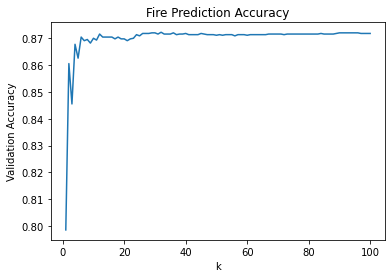

In [37]:
k_list = range(1,101)
accuracies = []

for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_x, train_y.values.ravel())
    accuracies.append(classifier.score(test_x, test_y))
      
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Fire Prediction Accuracy")
plt.show()

In [38]:
print(accuracies.index(max(accuracies)) + 1)
print(max(accuracies))

32
0.8721164613661814


### 2-2. MinMax

In [39]:
fire_features = fire_minmax.iloc[:, 1:]
fire_labels = fire_minmax.iloc[:, 0]

In [40]:
train_x, test_x, train_y, test_y = train_test_split(fire_features, fire_labels, test_size = 0.2, 
                                                    random_state = 100, stratify = fire_labels)
print(len(train_x), len(test_x), len(train_y), len(test_y))

17857 4465 17857 4465


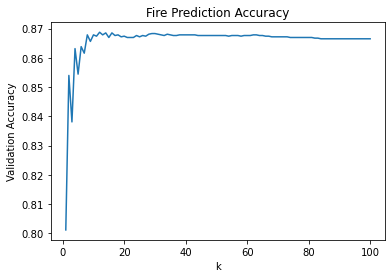

In [41]:
k_list = range(1,101)
accuracies = []

for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_x, train_y.values.ravel())
    accuracies.append(classifier.score(test_x, test_y))
      
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Fire Prediction Accuracy")
plt.show()

In [42]:
print(accuracies.index(max(accuracies)) + 1)
print(max(accuracies))

12
0.8687569988801792


### 2-3. Standard

In [43]:
fire_features = fire_standard.iloc[:, 1:]
fire_labels = fire_standard.iloc[:, 0]

In [44]:
train_x, test_x, train_y, test_y = train_test_split(fire_features, fire_labels, test_size = 0.2, 
                                                    random_state = 100, stratify = fire_labels)
print(len(train_x), len(test_x), len(train_y), len(test_y))

17857 4465 17857 4465


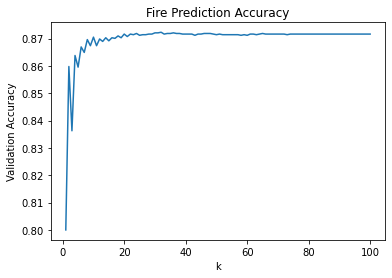

In [45]:
k_list = range(1,101)
accuracies = []

for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_x, train_y.values.ravel())
    accuracies.append(classifier.score(test_x, test_y))
      
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Fire Prediction Accuracy")
plt.show()

In [46]:
print(accuracies.index(max(accuracies)) + 1)
print(max(accuracies))

32
0.8723404255319149


## 3. Random Forest

### 3-1. Robust

In [47]:
fire_features = fire_robust.iloc[:, 1:]
fire_labels = fire_robust.iloc[:, 0]

train_x, test_x, train_y, test_y = train_test_split(fire_features, fire_labels, test_size = 0.2, 
                                                    random_state = 100, stratify = fire_labels)
print(len(train_x), len(test_x), len(train_y), len(test_y))

17857 4465 17857 4465


In [48]:
k = range(1, 301)
max_acc = 0
max_k = 0

for i in tqdm(k):
    rf = RandomForestClassifier(n_estimators = i, random_state = 100)
    rf.fit(train_x, train_y.values.ravel())

    predicted = rf.predict(test_x)
    accuracy = accuracy_score(test_y, predicted)
    
    if accuracy > max_acc:
        max_acc = accuracy
        max_k = i
        
print(f'Best accuracy score: {max_acc:.3}')
print(f'Best number of trees : {max_k}')

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [33:00<00:00,  6.60s/it]

Best accuracy score: 0.875
Best number of trees : 187


<AxesSubplot:>

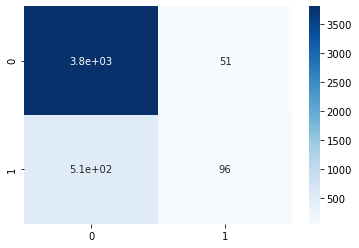

In [49]:
rf = RandomForestClassifier(n_estimators = max_k, random_state = 100)
rf.fit(train_x, train_y.values.ravel())

predicted = rf.predict(test_x)
accuracy = accuracy_score(test_y, predicted)

cm = pd.DataFrame(confusion_matrix(test_y, predicted))
sns.heatmap(cm, annot=True, cmap = 'Blues')

### 3-2. MinMax

In [50]:
fire_features = fire_minmax.iloc[:, 1:]
fire_labels = fire_minmax.iloc[:, 0]

train_x, test_x, train_y, test_y = train_test_split(fire_features, fire_labels, test_size = 0.2, 
                                                    random_state = 100, stratify = fire_labels)
print(len(train_x), len(test_x), len(train_y), len(test_y))

17857 4465 17857 4465


In [51]:
k = range(1, 301)
max_acc = 0
max_k = 0

for i in tqdm(k):
    rf = RandomForestClassifier(n_estimators = i, random_state = 100)
    rf.fit(train_x, train_y.values.ravel())

    predicted = rf.predict(test_x)
    accuracy = accuracy_score(test_y, predicted)
    
    if accuracy > max_acc:
        max_acc = accuracy
        max_k = i
        
print(f'Best accuracy score: {max_acc:.3}')
print(f'Best number of trees : {max_k}')

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [31:34<00:00,  6.32s/it]

Best accuracy score: 0.875
Best number of trees : 103


<AxesSubplot:>

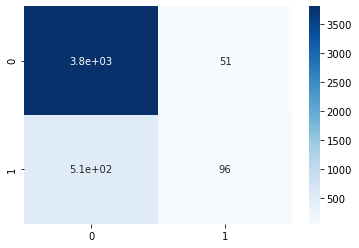

In [52]:
rf = RandomForestClassifier(n_estimators = max_k, random_state = 100)
rf.fit(train_x, train_y.values.ravel())

predicted = rf.predict(test_x)
accuracy = accuracy_score(test_y, predicted)

cm = pd.DataFrame(confusion_matrix(test_y, predicted))
sns.heatmap(cm, annot=True, cmap = 'Blues')

### 3-3. Standard

In [53]:
fire_features = fire_standard.iloc[:, 1:]
fire_labels = fire_standard.iloc[:, 0]

train_x, test_x, train_y, test_y = train_test_split(fire_features, fire_labels, test_size = 0.2, 
                                                    random_state = 100, stratify = fire_labels)
print(len(train_x), len(test_x), len(train_y), len(test_y))

17857 4465 17857 4465


In [54]:
k = range(1, 301)
max_acc = 0
max_k = 0

for i in tqdm(k):
    rf = RandomForestClassifier(n_estimators = i, random_state = 100)
    rf.fit(train_x, train_y.values.ravel())

    predicted = rf.predict(test_x)
    accuracy = accuracy_score(test_y, predicted)
    
    if accuracy > max_acc:
        max_acc = accuracy
        max_k = i
        
print(f'Best accuracy score: {max_acc:.3}')
print(f'Best number of trees : {max_k}')

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [31:48<00:00,  6.36s/it]

Best accuracy score: 0.875
Best number of trees : 200


<AxesSubplot:>

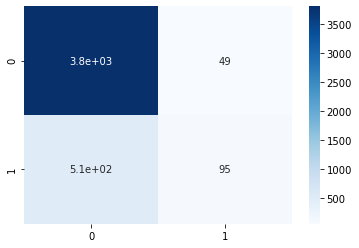

In [55]:
rf = RandomForestClassifier(n_estimators = max_k, random_state = 100)
rf.fit(train_x, train_y.values.ravel())

predicted = rf.predict(test_x)
accuracy = accuracy_score(test_y, predicted)

cm = pd.DataFrame(confusion_matrix(test_y, predicted))
sns.heatmap(cm, annot=True, cmap = 'Blues')